# Library

## Install Library

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25867 sha256=cad8785341bcfaab3f6978e4ba932a2f8089dc4466c51ce38de3233ae31b0ef1
  Stored in directory: c:\users\wawn1\appdata\local\pip\cache\wheels\85\cf\3a\e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as img_
from keras.metrics import categorical_accuracy
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Preprocessing

In [3]:
# Tentukan jalur direktori untuk data latih, validasi, dan uji
train_data = "../data/javaneseScript_Augmented_byHannan/train" 
val_data = "../data/javaneseScript_Augmented_byHannan/val"
test_data = "../data/javaneseScript_Augmented_byHannan/test"

In [4]:
# Applying Data normalization and Data augmentation
img_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = img_datagen.flow_from_directory(
    train_data,
    batch_size=32,
    color_mode="rgb",
    target_size=(64, 64),
    class_mode="categorical"
)

validation_generator = img_datagen.flow_from_directory(
    val_data,
    batch_size=32,
    color_mode="rgb",
    target_size=(64, 64),
    class_mode="categorical"
)

test_generator = img_datagen.flow_from_directory(
    test_data,
    batch_size=32,
    color_mode="rgb",
    target_size=(64, 64),
    class_mode="categorical"
)

Found 8400 images belonging to 20 classes.
Found 2400 images belonging to 20 classes.
Found 1200 images belonging to 20 classes.


In [5]:
# import zipfile

# # Nama file zip Anda
# zip_file = 'archive_4.zip'

# # Direktori tempat Anda ingin mengekstrak file-file dari zip
# extracted_dir = 'augmented/'

# # Membuka file zip
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     # Mengekstrak semua file ke dalam direktori tujuan
#     zip_ref.extractall(extracted_dir)

# print(f'Dataset telah diekstrak ke {extracted_dir}')

In [6]:
# def switch_dict_key_values(this_dict):
#     return dict((v,k) for k,v in this_dict.items())

# classes_name = switch_dict_key_values(train_generator.class_indices)
# print(classes_name)

# Model

In [8]:
model = Sequential()
# kernel = 3

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.75))

model.add(Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

In [10]:
history = model.fit(
    train_generator, 
    epochs=50,
    validation_data=validation_generator
)


Epoch 1/50
263/263 [==============================] - 259s 983ms/step - loss: 2.9762 - accuracy: 0.0842 - val_loss: 2.9472 - val_accuracy: 0.0725
Epoch 2/50
263/263 [==============================] - 198s 747ms/step - loss: 2.7289 - accuracy: 0.2444 - val_loss: 2.2751 - val_accuracy: 0.3162
Epoch 3/50
263/263 [==============================] - 179s 677ms/step - loss: 1.5852 - accuracy: 0.5263 - val_loss: 1.7304 - val_accuracy: 0.4387
Epoch 4/50
263/263 [==============================] - 190s 715ms/step - loss: 0.7014 - accuracy: 0.7907 - val_loss: 1.0203 - val_accuracy: 0.6775
Epoch 5/50
263/263 [==============================] - 311s 1s/step - loss: 0.2934 - accuracy: 0.9199 - val_loss: 0.8150 - val_accuracy: 0.7454
Epoch 6/50
263/263 [==============================] - 243s 912ms/step - loss: 0.1373 - accuracy: 0.9655 - val_loss: 0.7743 - val_accuracy: 0.7829
Epoch 7/50
263/263 [==============================] - 246s 931ms/step - loss: 0.0702 - accuracy: 0.9844 - val_loss: 0.7976 - va

Text(0.5, 1.0, 'Accuracy Evolution')

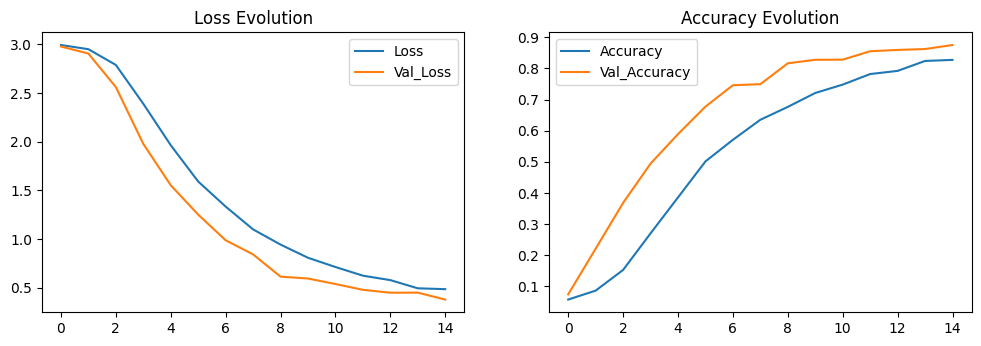

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2) 
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [17]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

38/38 [==============================] - 5s 123ms/step - loss: 0.2943 - accuracy: 0.9058
Test Accuracy: 90.58%


# Testing

In [19]:
model.save('..\Oprek\oprek_model.h5')

In [20]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


def get_letters(img):
    letters = []    
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        count = 1
        pad = 0.1
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
#             cv2.rectangle(box_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi = image[y:y + h, x:x + w]        
        bordersize = int(0.1*x)
        roi = cv2.copyMakeBorder(
            roi,
            top=bordersize,
            bottom=bordersize,
            left=bordersize,
            right=bordersize,
            borderType=cv2.BORDER_CONSTANT,
            value = [255,255,255]
        )
        thresh = cv2.resize(roi, (64, 64))
        img = img_.img_to_array(thresh)
        img = np.expand_dims(img, axis = 0)

        test_gen = ImageDataGenerator(
            rescale = 1./255
        )
        
        image_gen = test_gen.flow(img)

        ypred = model.predict(image_gen)
        ypred = np.argmax(ypred,axis=1)
        [x] = ypred
        letters.append(str(classes_name[x]))
        
        cv2.putText(img=roi, text=str(classes_name[x]), org=(0, int(roi.shape[1]*0.1)), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0))
        plt.figure()
        plt.imshow(roi)
        
    return letters, image

def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 57ms/step
predicted :  dhahara


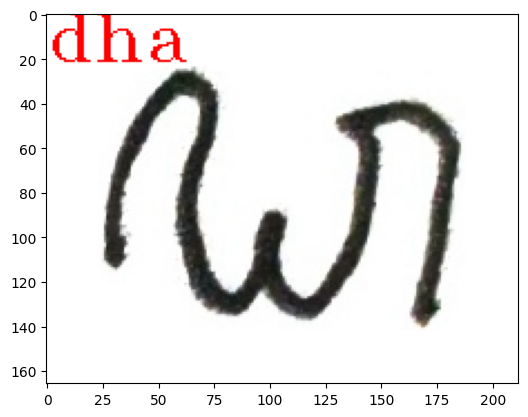

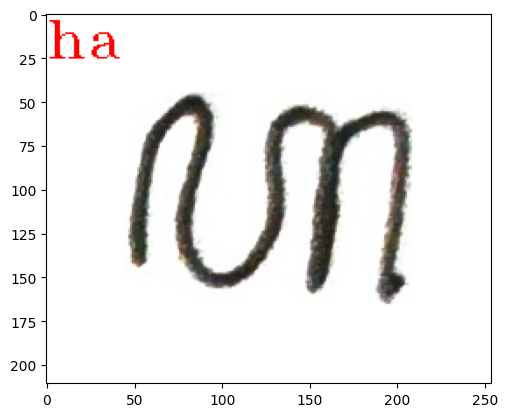

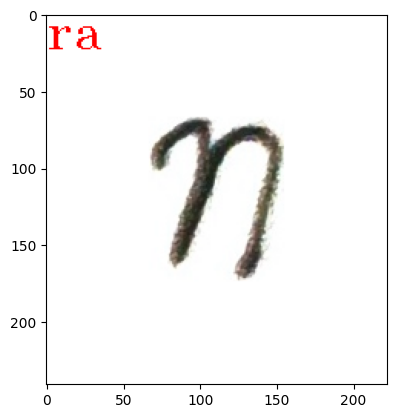

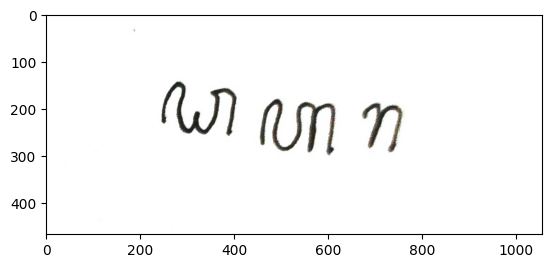

In [21]:
import imutils
letter,image = get_letters('../Oprek/Ori_Data_Aug/predict_test/dhahara.jpg')
word = get_word(letter)
print('predicted :  ' + word)
plt.figure()
plt.imshow(image)

1/1 [==============================] - 0s 47ms/step
predicted :  jawanagara


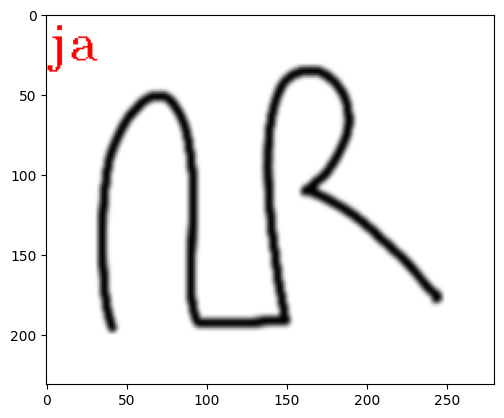

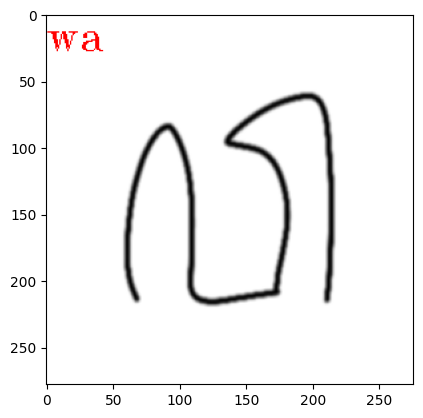

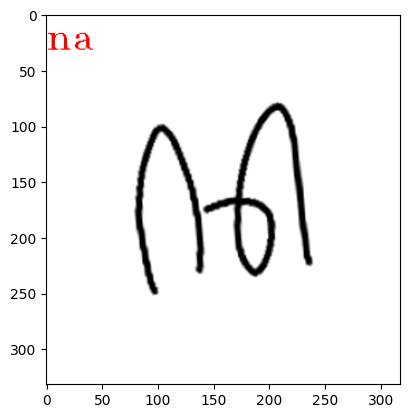

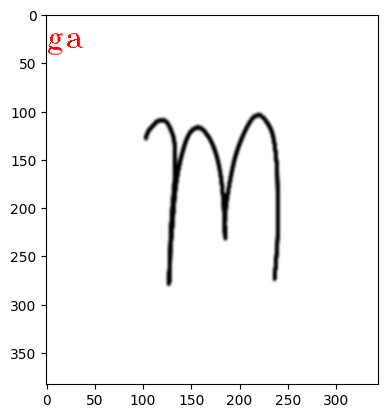

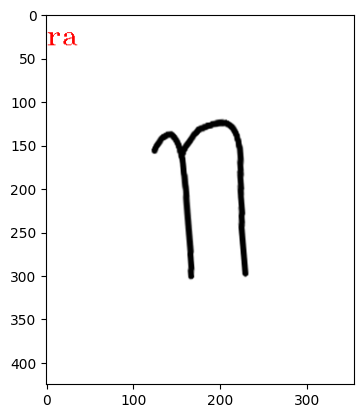

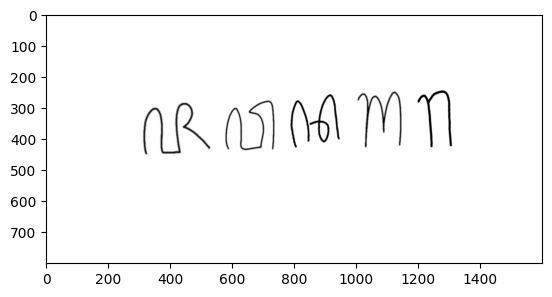

In [22]:
letter,image = get_letters('../Oprek/Ori_Data_Aug/predict_test/jawanagara.png')
word = get_word(letter)
print('predicted :  ' + word)
plt.figure()
plt.imshow(image)

1/1 [==============================] - 0s 50ms/step
predicted :  gamayana


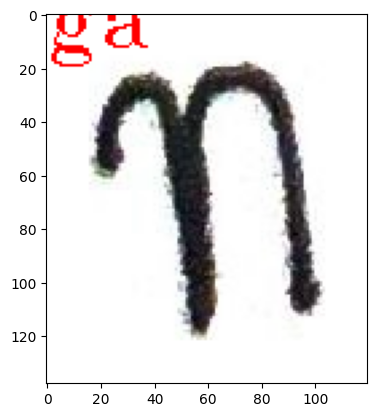

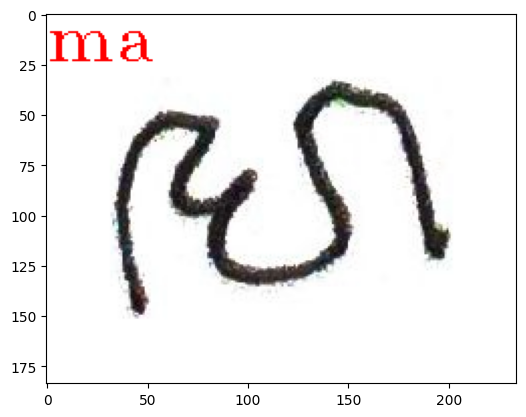

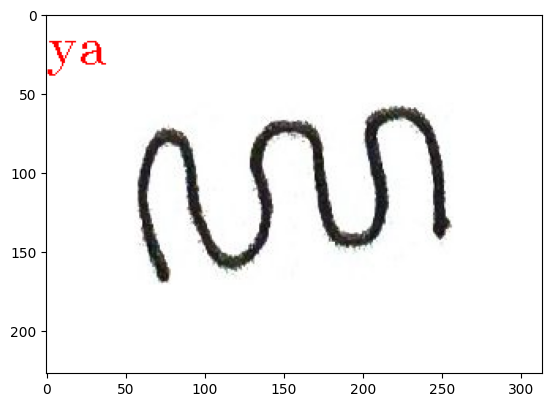

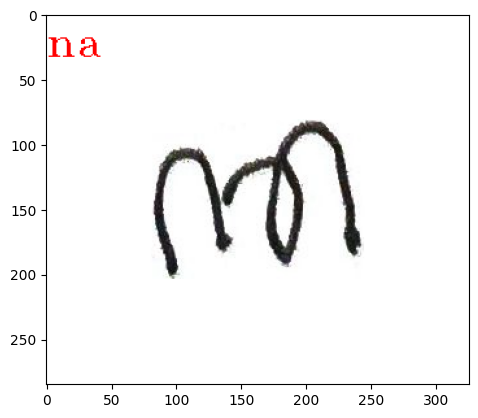

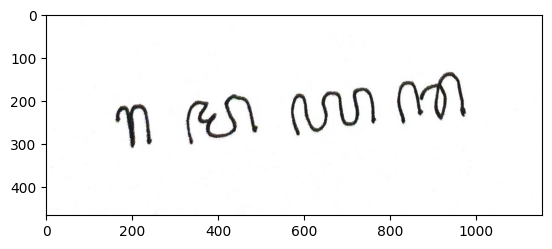

In [23]:
letter,image = get_letters('../Oprek/Ori_Data_Aug/predict_test/ramayana.jpg')
word = get_word(letter)
print('predicted :  ' + word)
plt.figure()
plt.imshow(image)

1/1 [==============================] - 0s 47ms/step
predicted :  salaca


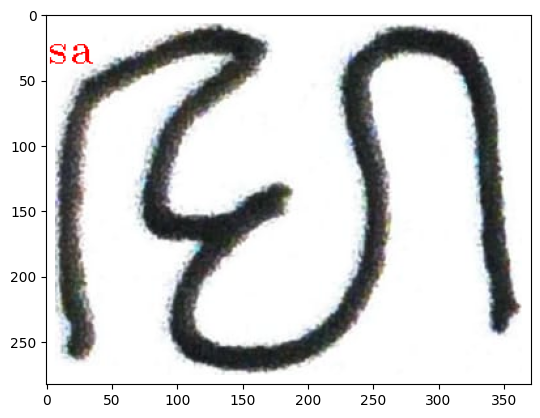

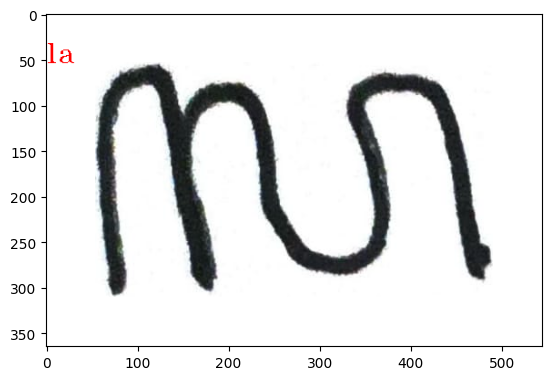

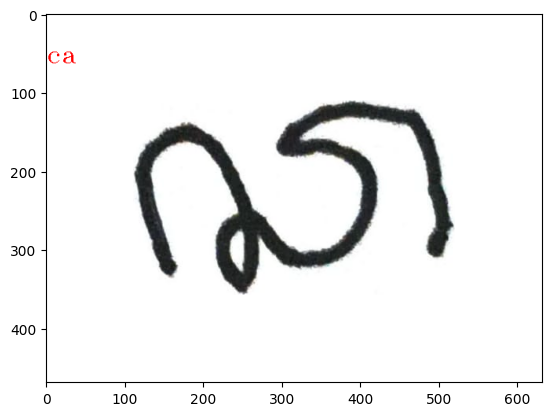

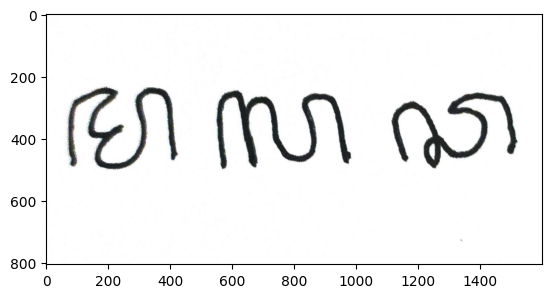

In [24]:
letter,image = get_letters('../Oprek/Ori_Data_Aug/predict_test/malaca.jpeg')
word = get_word(letter)
print('predicted :  ' + word)
plt.figure()
plt.imshow(image)

1/1 [==============================] - 0s 122ms/step
predicted :  jayapanaha


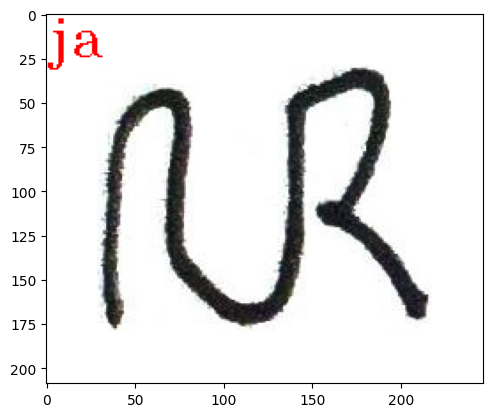

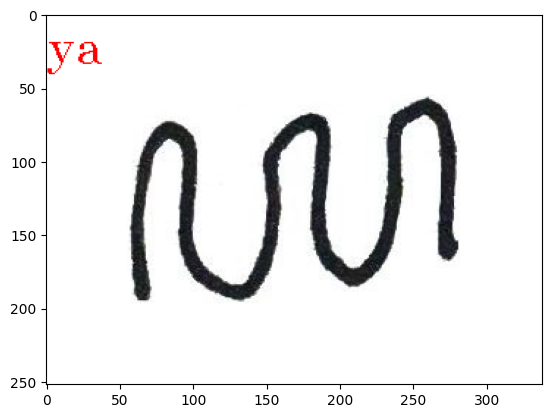

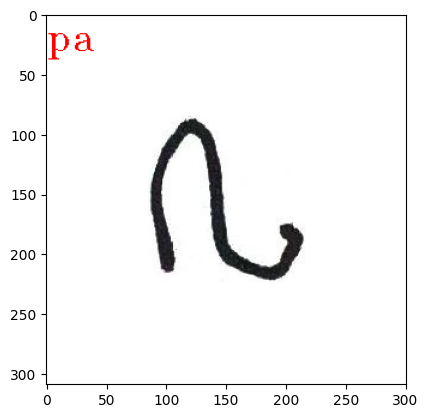

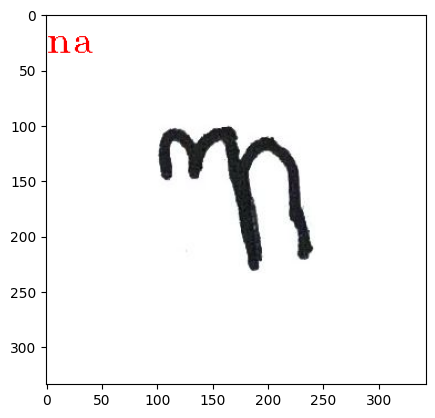

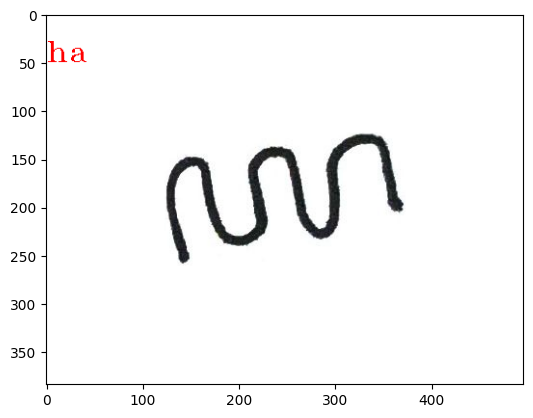

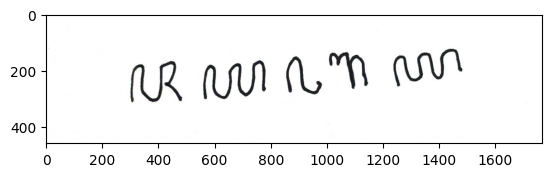

In [25]:
letter,image = get_letters('../Oprek/Ori_Data_Aug/predict_test/jayabaya.jpg')
word = get_word(letter)
print('predicted :  ' + word)
plt.figure()
plt.imshow(image)